## Fake Job Listings Detection
#### Ekwe Collins Odinaka

17<sup>th</sup> November 2022

I believe most persons have had experiences with job listings at one point in their lives. Either seen on linkedin, twitter or a friend sent you a link to a job opening ad. Sometimes it turns out to be a fake job listing where the perpetrators are either looking for clicks on their sites or on the bad case scenarios when it fraudsters gunning for vital informations or kidnappers. Also has a Nigerian you might be familiar with the story of a young girl who went to the location of a job posting and got kidnapped and eventually killed.

Fake job listing detection has become more relevant to us, as the stakes to be a able to detect fake and real job listing by comparing previous job listing data increases daily. The building of a fake job listing detection system might help save a life or avoid the risk of giving away vital and personal informations to fraudsters.

#### Natural Language Processing (NLP)

NLP is a machine learning (ML) tool that allows machine to understand, interpret, analyze and manipulate the human language. NLP is used by developers to perform translation tasks, word recognition, speech recognition, topic segmentation, and automtatic summarization.

Syntax in the arrangement of words in a sentence to make sense. NLP uses this to access meaning from a sentence using grammatical rules. NLP uses algorithms and structure to be able to understand the meaning behind words and sentences. In building an NLP pipeline the following steps are used

* Sentence Segmentation

* Word Tokenization

* Stemming

* Lemmatization

* Identifying Stop Words

* Dependency Parsing

* POS Tags (Parts of Speech)

* Entity Recognition

* Chunking


#### Importing Libriaries and Modules 

The necessary modules need to be installed so as to be able to classify between fake and real job listings.

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U spacy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import re
import string
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
!pip install spacy && python -m spacy download en

     -------------------------------------- 12.8/12.8 MB 376.2 kB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


#### The Dataset

the dataset used for this project was gotten from `kaggle`. The dataset contains data of over 18,000 job listings (both real and fake). Next we import the dataset into the 

In [8]:
path = 'C://Users//hp//Downloads//fake_job_postings.csv'
df = pd.read_csv(path)
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


Lets check the shape of the dataset to know how many rows and columns are present using the pandas `shape` method

In [9]:
df.shape

(17880, 18)

There are `17,880` rows and `18` columns present in the dataset. Lets check for missing values present in the dataset

In [10]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

This dataset has lots of missing values in columns that are useful to the projects. First we will drop columns not useful to the projects like job_id, telecommuting, has_company_logo, has_questions, salary_range, and employment_type.

After we drop the columns we wont be needing for the project, next we fill up the missing values with a blank space

In [11]:
column = ["job_id", "telecommuting", "has_company_logo", "has_questions", "salary_range", "employment_type"]
for col in column:
    del df[col]
    
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [12]:
df.fillna(' ', inplace=True)
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


Let's see how many fraudulent job listings are available using `value_counts()`, and then plot a countplot of fraudulent job listing(denoted as 1) and non-fraudulent job listings(denoted as 0). 

In [13]:
df['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

There are `866` fraudulent job listings in this dataset

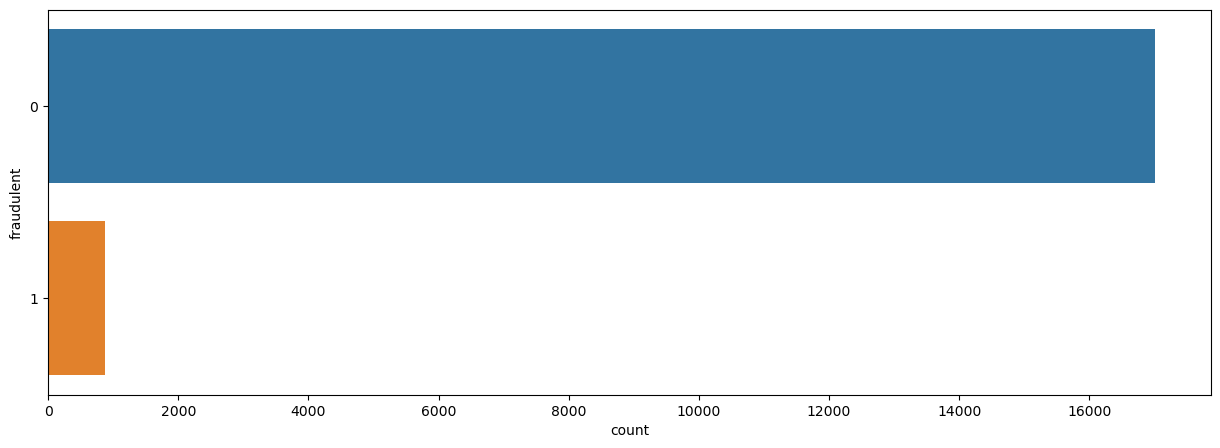

In [14]:
plt.figure(figsize=(15, 5))
sns.countplot(y='fraudulent', data=df)
plt.show()

Lets do something similar for the `required_experience` column. to see the number of different required experience available and plot a bar chart to visualize it.

In [15]:
req_exp = df['required_experience'].value_counts()
del req_exp[' '] #this is so the blankspace don't get counted

req_exp

Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: required_experience, dtype: int64

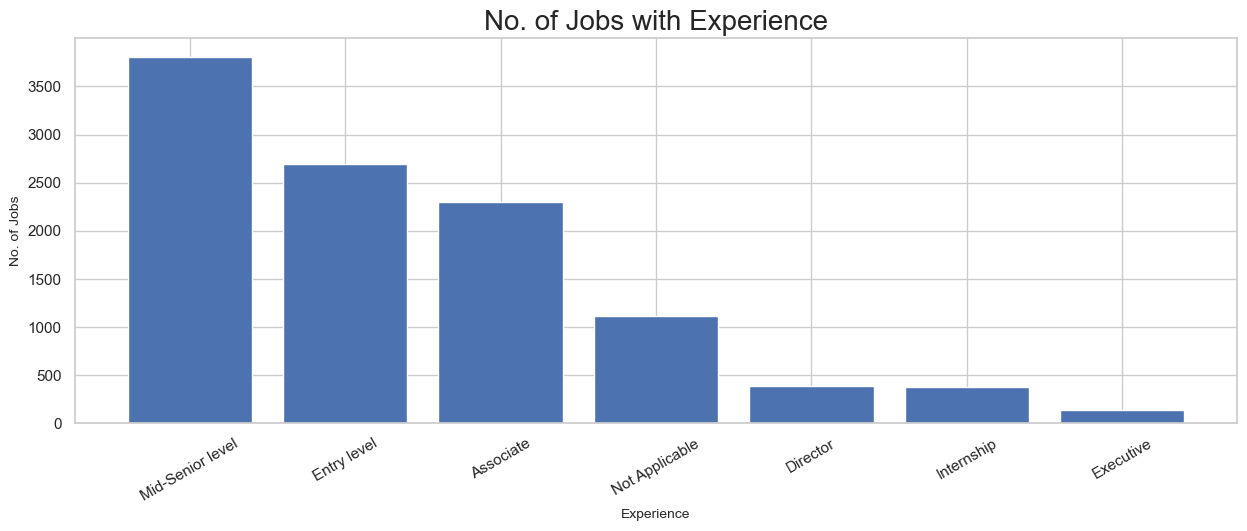

In [16]:
exp = ['Mid-Senior level', 'Entry level', 'Associate', 'Not Applicable', 'Director', 'Internship', 'Executive']

plt.figure(figsize=(15,5))
sns.set_theme(style='whitegrid')
plt.bar(exp, req_exp)
plt.title('No. of Jobs with Experience', size=20)
plt.xlabel('Experience', size=10)
plt.ylabel('No. of Jobs', size=10)
plt.xticks(rotation=30)
plt.show()

The job experience with the highest job listing is `Mid-Senior level` followed by `Entry-level`. The job experience with the least listing is `Executive`, this might be due to the fact that there are very few executive openings and most of the available executive positions, have applicants that are being contacted directly and not on job listings.

Lets check for the `required_education` column and see the education requirements and visualize them

In [17]:
df['required_education'].value_counts()

                                     8105
Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

In [18]:
req_edu = df['required_education'].value_counts()[:7]
del req_edu[' '] #this is so the blankspace don't get counted

req_edu

Bachelor's Degree            5145
High School or equivalent    2080
Unspecified                  1397
Master's Degree               416
Associate Degree              274
Certification                 170
Name: required_education, dtype: int64

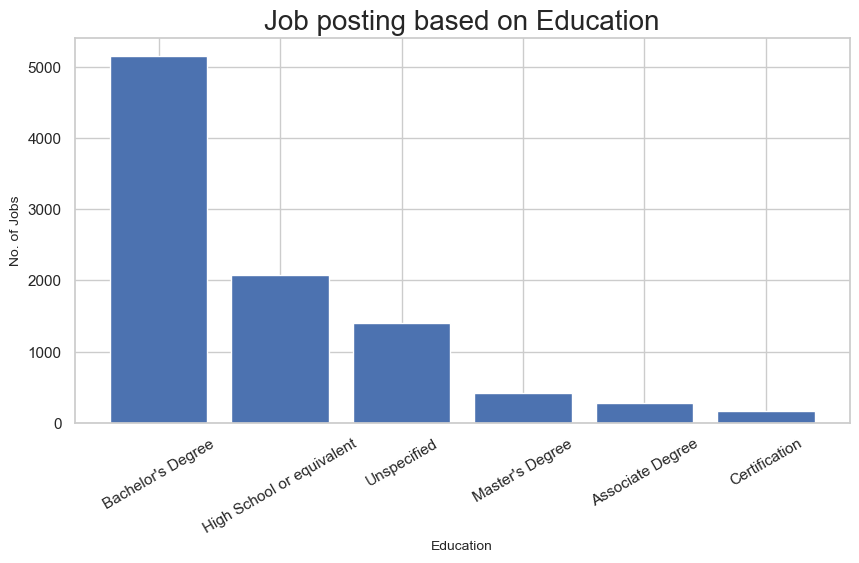

In [19]:
edu_level = ["Bachelor's Degree", "High School or equivalent", "Unspecified", 
             "Master's Degree", "Associate Degree", "Certification"]
             

plt.figure(figsize=(10,5))
sns.set_theme(style='whitegrid')
plt.bar(edu_level, req_edu)
plt.title('Job posting based on Education', size=20)
plt.xlabel('Education', size=10)
plt.ylabel('No. of Jobs', size=10)
plt.xticks(rotation=30)
plt.show()

Lets check for the title mostly used when the job listing is not fraudulent and also check for the title used when the job listing was fraudulent

In [20]:
non_fraud_title = df[df.fraudulent==0].title.value_counts()[:10]
non_fraud_title

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64

In [21]:
fraud_title = df[df.fraudulent==1].title.value_counts()[:10]
fraud_title

Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: title, dtype: int64

`Data Entry Remote` number 1.... explains a lot.. lol

Alright, lets create a data frame with 2 columns, the first column contains merged text from the selected columns (see below) and the second column will be the fraudulent column

In [22]:
column_names = list(df)
column_names

['title',
 'location',
 'department',
 'company_profile',
 'description',
 'requirements',
 'benefits',
 'required_experience',
 'required_education',
 'industry',
 'function',
 'fraudulent']

In [23]:
df['text'] = df['title']+' '+df['company_profile']+' '+df['description']+' '+df['requirements']+' '+df['benefits']
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,text
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,"Marketing Intern We're Food52, and we've creat..."
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,Customer Service - Cloud Video Production 90 S...
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0,Commissioning Machinery Assistant (CMA) Valor ...
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,Account Executive - Washington DC Our passion ...
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,Bill Review Manager SpotSource Solutions LLC i...


In [24]:
df1 = df[['text', 'fraudulent']]
df1.head()

,text,fraudulent
0,"Marketing Intern We're Food52, and we've creat...",0
1,Customer Service - Cloud Video Production 90 S...,0
2,Commissioning Machinery Assistant (CMA) Valor ...,0
3,Account Executive - Washington DC Our passion ...,0
4,Bill Review Manager SpotSource Solutions LLC i...,0


Lets create a wordcloud for fradulent jobs and non_fraudulent jobs. First we store them in different variables

In [25]:
non_fraud_job = df1[df1.fraudulent==0].text
fraud_job = df1[df1.fraudulent==1].text

Create a wordcloud for fraudulent jobs 

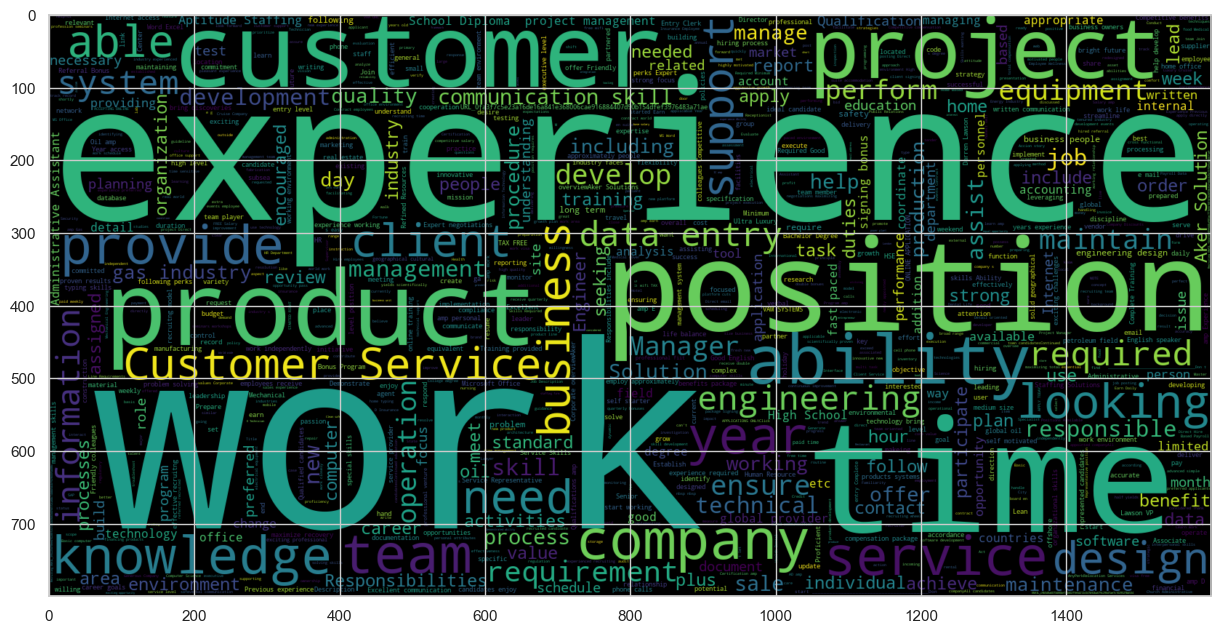

In [26]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize=(15,15))
wc = WordCloud(min_font_size=3, max_words=3000, width=1600, height=800, stopwords=STOPWORDS).generate(str(" ".join(fraud_job)))
plt.imshow(wc, interpolation='bilinear')

Lets do the same for non-fraudulent jobs (real job listings)

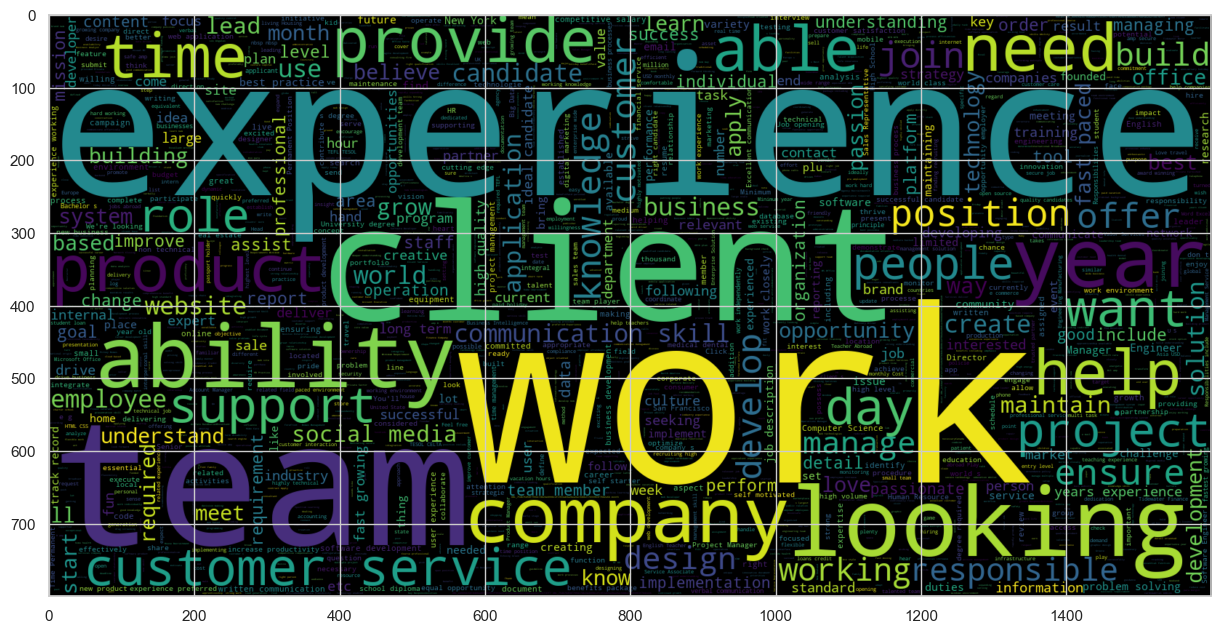

In [27]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize=(15,15))
wc = WordCloud(min_font_size=3, max_words=3000, width=1600, height=800, stopwords=STOPWORDS).generate(str(" ".join(non_fraud_job)))
plt.imshow(wc, interpolation='bilinear')

#### Data Preprocessing

Data preprocessing is the process of manipulating or dropping of data before it is being used in order to ensure or enhance performance.

First we create a list of punctuation marks, then we create a list of stopwords.
Next, we load english tokenizers, parsers, and word vector.

Also we create a tokenizer function, then we create a token object which is used to create documents with linguistic annotations.

Then we lemmatize each token and convert each token into lowercase. After which, we remove all the stopwords then we return all the processed list of tokens.

After this, we custom transform using spacy, then we remove space and convert to lower case

In [28]:
punctuations = string.punctuation

nlp = spacy.load("en_core_web_sm")
stp_words = spacy.lang.en.stop_words.STOP_WORDS

parser = English()

def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    
    mytokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens]
    
    mytokens = [word for word in mytokens if word not in stop_words and word not in punctuations]
    
    return mytokens

class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    
    def fit(self, X, y=None, **fit_params):
        return self
    
    def get_params(self, deep=True):
        return {}
    
def clean_text(text):
    return text.strip().lower()

In [29]:
df1['text'] = df1['text'].apply(clean_text)

C:\Users\hp\AppData\Local\Temp\ipykernel_9108\975192049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text'] = df1['text'].apply(clean_text)


In [30]:
cv = TfidfVectorizer(max_features=100)
X = cv.fit_transform(df1['text'])
df2 = pd.DataFrame(X.toarray(), columns=cv.get_feature_names())
df1.drop(['text'], axis=1, inplace=True)
main_df = pd.concat([df2, df1], axis=1)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\hp\AppData\Local\Temp\ipykernel_9108\367090333.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['text'], axis=1, inplace=True)


In [31]:
main_df.head()

,ability,about,all,also,amp,an,and,are,as,at,...,who,will,with,work,working,world,years,you,your,fraudulent
0,0.000000,0.041120,0.000000,0.042424,0.036488,0.000000,0.755238,0.000000,0.078653,0.000000,...,0.000000,0.000000,0.186067,0.051026,0.068029,0.000000,0.000000,0.000000,0.000000,0
1,0.021895,0.094183,0.035394,0.024292,0.041787,0.029771,0.490896,0.056626,0.060050,0.052431,...,0.000000,0.078004,0.165735,0.043827,0.116862,0.099327,0.000000,0.204854,0.130452,0
2,0.000000,0.000000,0.176807,0.000000,0.041749,0.089231,0.397029,0.113149,0.000000,0.000000,...,0.000000,0.062346,0.307512,0.058383,0.000000,0.000000,0.000000,0.094462,0.074476,0
3,0.023267,0.000000,0.018806,0.000000,0.000000,0.094909,0.695542,0.000000,0.031906,0.037144,...,0.023132,0.049735,0.075480,0.046573,0.000000,0.105551,0.019806,0.050236,0.059411,0
4,0.000000,0.000000,0.068009,0.000000,0.040147,0.028602,0.606379,0.081605,0.115386,0.000000,...,0.000000,0.000000,0.159230,0.028071,0.037425,0.000000,0.035814,0.030279,0.107427,0


#### Split Dataset

Next we split our dataset into a train and test dataset using the `sklear` module `train_test_split`
Add all word columns of the `main_df` dataset to X, excluding the fraudulent column which will be added to Y. The dataset will be splited 70% as training data and 30% as tersting data.

In [32]:
Y = main_df.iloc[:, -1]
X = main_df.iloc[:, :-1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

Lets check the shape of each of the splitted data

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12516, 100)
(5364, 100)
(12516,)
(5364,)


#### Model

We are going to be using the `RandomForestClassifier` algorithm and we are going to apply it to the dataset(train dataset). 

In [34]:
random_class = RandomForestClassifier(n_jobs=3, oob_score=True, n_estimators=100, criterion='entropy')
model = random_class.fit(x_train, y_train)

After fitting the model to the dataset, we are going to `predict` a fraudulent job listing using the model.
First we print the x_test data to get an understanding of what it is, then we predict using the `.predict` method. After which we will use the `accuracy_score` to compare the predicted result with the actual result from the test data (y_test)

In [35]:
print(x_test)

        ability     about       all      also       amp        an       and  \
12132  0.036295  0.000000  0.000000  0.040269  0.034635  0.000000  0.503756   
10585  0.000000  0.101204  0.133113  0.078309  0.044902  0.095970  0.414458   
17287  0.000000  0.000000  0.000000  0.000000  0.000000  0.076700  0.421575   
2805   0.000000  0.048505  0.109368  0.050042  0.000000  0.000000  0.409319   
9752   0.000000  0.044207  0.099678  0.068413  0.039228  0.041921  0.394997   
...         ...       ...       ...       ...       ...       ...       ...   
3579   0.043473  0.000000  0.000000  0.000000  0.041485  0.059111  0.487344   
8957   0.089130  0.000000  0.000000  0.098889  0.000000  0.060596  0.190319   
14966  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.411312   
9328   0.000000  0.108940  0.027293  0.000000  0.032223  0.068871  0.450645   
17428  0.000000  0.068617  0.000000  0.000000  0.000000  0.043379  0.272491   

            are        as        at  ...      well 

In [36]:
prediction = random_class.predict(x_test)
score = accuracy_score(y_test, prediction)
score

0.9716629381058911

The accuracy_score gave the model a `97.3%` score. Next, we create a classification report and a confusion matrix

In [37]:
print("Classification Report\n")
print(classification_report(y_test, prediction))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, prediction))

Classification Report

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5114
           1       1.00      0.39      0.56       250

    accuracy                           0.97      5364
   macro avg       0.99      0.70      0.77      5364
weighted avg       0.97      0.97      0.97      5364

Confusion Matrix

[[5114    0]
 [ 152   98]]


### Conclusion

This project predicts if a job listings ia a fraudulent job listing or a real job listings. The Random Forest Classifier is the algorithm used for this, other algorithms like the Support Vector Machine(SVM). 

The dataset has various limitations like the following;

* Has lots of missing values

* Does not take into account intent, so there's still need for one to be careful and do proper research on all job listings

Also there are few observations to be made, most of the jobs titles that are fraudulent are not usually popular job positions eg, cruise staff, data entry clerk, payroll clerk, etc.